In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sn
from sqlalchemy import create_engine

import scipy.stats as st
from scipy.stats import linregress

# Concrete Data

In [2]:
file1 = "Resources/Concrete_Data.csv"

In [3]:
concrete = pd.read_csv(file1)
print(len(concrete))
concrete.head(10)

1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
concrete = concrete.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement", "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": Slag", "Fly Ash (component 3)(kg in a m^3 mixture)": "FlyAsh", "Water  (component 4)(kg in a m^3 mixture)": "Water", "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer", "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "CoarseAggregate", "Fine Aggregate (component 7)(kg in a m^3 mixture)": "FineAggregate", "Age (day)": "Age", "Concrete compressive strength(MPa, megapascals)": "CompressiveStrength"})
concrete.head()

SyntaxError: invalid syntax (<ipython-input-4-9a8c80dd7b8e>, line 1)

In [21]:
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
X = concrete.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = concrete.iloc[:,8]
print(X.shape, y.shape)

(1030, 8) (1030,)


In [6]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# y_scaler = MinMaxScaler().fit([y_train])
# y_train_scaled = y_scaler.transform([y_train])
# y_test_scaled = y_scaler.transform([y_test])

In [9]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier

RandomForestRegressor()

In [10]:
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9851961883810105
Testing Data Score: 0.8878353287733282


In [11]:
classifier.feature_importances_

array([0.32133542, 0.07177353, 0.02108984, 0.11286001, 0.07319079,
       0.02888372, 0.03826573, 0.33260097])

In [12]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [100, 1000],
#               'criterion': ['mse', 'mae']}
# grid = GridSearchCV(classifier, param_grid, verbose=3)

In [13]:
# grid.fit(X_train_scaled, y_train)

In [14]:
# print(grid.best_params_)

In [15]:
# predictions = grid.predict(X_test_scaled)

In [16]:
# print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

In [18]:
# import joblib
# filename = 'concrete.sav'
# joblib.dump(classifier, filename)

In [17]:
concrete.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<IPython.core.display.Javascript object>


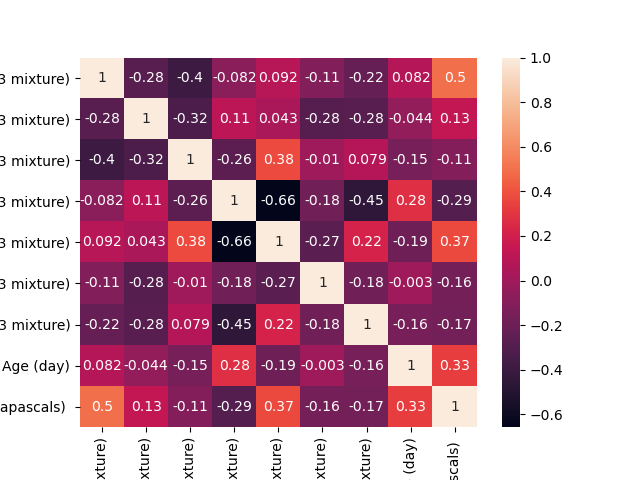

In [18]:
corr = concrete.corr()
# print(corrMatrix)
sn.heatmap(corr, annot=True)
# figure size in inches

plt.show()

In [20]:
matrix = concrete.corr().values.tolist()
print(matrix)

[[1.0, -0.27521591103032106, -0.39746734080690077, -0.08158674846410628, 0.09238617275377926, -0.10934899412490486, -0.22271784866558836, 0.08194602387182154, 0.4978319193241552], [-0.27521591103032106, 1.0, -0.32357990050638485, 0.1072520272110922, 0.04327041876104116, -0.2839986119592142, -0.2816026706141923, -0.04424601930445421, 0.1348292614974053], [-0.39746734080690077, -0.32357990050638485, 1.0, -0.2569840228651499, 0.37750314590136935, -0.009960827842260279, 0.07910849096499867, -0.15437051606793012, -0.10575491629731448], [-0.08158674846410628, 0.1072520272110922, -0.2569840228651499, 1.0, -0.6575329076284471, -0.18229360186143453, -0.45066117413001333, 0.2776182215210091, -0.28963338498530294], [0.09238617275377926, 0.04327041876104116, 0.37750314590136935, -0.6575329076284471, 1.0, -0.2659991481862881, 0.22269122991318724, -0.19270002804347233, 0.3660788271885193], [-0.10934899412490486, -0.2839986119592142, -0.009960827842260279, -0.18229360186143453, -0.2659991481862881, 1

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.609907286822649
Testing Score: 0.6249829353885574


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(units=170, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

In [25]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [26]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=150,
    shuffle=True,
    verbose=2
)

Epoch 1/150
25/25 - 1s - loss: 1015.9574 - mae: 26.6084
Epoch 2/150
25/25 - 0s - loss: 260.5264 - mae: 12.8262
Epoch 3/150
25/25 - 0s - loss: 213.9166 - mae: 11.8365
Epoch 4/150
25/25 - 0s - loss: 190.3604 - mae: 11.1119
Epoch 5/150
25/25 - 0s - loss: 172.5318 - mae: 10.6816
Epoch 6/150
25/25 - 0s - loss: 161.4359 - mae: 10.2975
Epoch 7/150
25/25 - 0s - loss: 150.9500 - mae: 9.9467
Epoch 8/150
25/25 - 0s - loss: 141.6100 - mae: 9.6508
Epoch 9/150
25/25 - 0s - loss: 130.0655 - mae: 9.1925
Epoch 10/150
25/25 - 0s - loss: 121.6929 - mae: 8.8519
Epoch 11/150
25/25 - 0s - loss: 112.0058 - mae: 8.4214
Epoch 12/150
25/25 - 0s - loss: 103.4662 - mae: 8.0650
Epoch 13/150
25/25 - 0s - loss: 94.6015 - mae: 7.6943
Epoch 14/150
25/25 - 0s - loss: 86.9248 - mae: 7.3490
Epoch 15/150
25/25 - 0s - loss: 78.0006 - mae: 6.8852
Epoch 16/150
25/25 - 0s - loss: 70.8828 - mae: 6.5189
Epoch 17/150
25/25 - 0s - loss: 65.7964 - mae: 6.2263
Epoch 18/150
25/25 - 0s - loss: 59.7342 - mae: 5.8754
Epoch 19/150
25/25

In [27]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 37.4263 - mae: 4.4909
Normal Neural Network - Loss: 37.42628479003906, Accuracy: 4.490930557250977


In [28]:
con = model.predict(X_test_scaled)
print(con)

[[54.128872 ]
 [47.29043  ]
 [77.11521  ]
 [41.17358  ]
 [ 9.073358 ]
 [45.45217  ]
 [24.938347 ]
 [54.657383 ]
 [33.762463 ]
 [47.043915 ]
 [40.80065  ]
 [14.053055 ]
 [54.6398   ]
 [50.620304 ]
 [30.139212 ]
 [31.076942 ]
 [35.24318  ]
 [23.407574 ]
 [29.57562  ]
 [33.04077  ]
 [41.58884  ]
 [41.711037 ]
 [45.656414 ]
 [17.783611 ]
 [31.901176 ]
 [37.52232  ]
 [14.236759 ]
 [53.719707 ]
 [57.16848  ]
 [17.831081 ]
 [50.69387  ]
 [38.35945  ]
 [50.08858  ]
 [62.467472 ]
 [21.5493   ]
 [40.215267 ]
 [33.754566 ]
 [43.683475 ]
 [12.492183 ]
 [54.94167  ]
 [19.539434 ]
 [ 8.216078 ]
 [36.937202 ]
 [47.956104 ]
 [12.117251 ]
 [77.90797  ]
 [47.153664 ]
 [40.256268 ]
 [27.272495 ]
 [11.755312 ]
 [55.79162  ]
 [44.96406  ]
 [24.65488  ]
 [18.734318 ]
 [50.874683 ]
 [41.136425 ]
 [27.11628  ]
 [17.019938 ]
 [38.440903 ]
 [23.393707 ]
 [43.853924 ]
 [16.774067 ]
 [38.287136 ]
 [50.762077 ]
 [34.18803  ]
 [16.195745 ]
 [33.696175 ]
 [13.186635 ]
 [30.914776 ]
 [26.039436 ]
 [11.820258 ]
 [29.9

In [29]:
print(y_test)

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
440    24.85
346    40.15
254    13.54
694    32.88
344    17.57
Name: Concrete_Compressive_Strength, Length: 258, dtype: float64


In [30]:
# model.save("maeConcrete.h5")

In [31]:
# import joblib
# filename2 = 'concrete2.sav'
# joblib.dump(X_scaler, filename2)

In [43]:
# concrete = concrete.reset_index()
# concrete = concrete.drop(columns = ["index"])
concrete.head()

,Cement_kg_in_a_Cubic_Meter_Mixture,Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture,Fly_Ash_kg_in_a_Cubic_Meter_Mixture,Water_kg_in_a_Cubic_Meter_Mixture,Superplasticizer_kg_in_a_Cubic_Meter_Mixture,Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture,Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture,Age_in_Days,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
engine = create_engine("sqlite:///Concrete.db")


concrete.to_sql("concrete", con=engine, index=False, if_exists='append')

In [46]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Cement_kg_in_a_Cubic_Meter_Mixture              1030 non-null   float64
 1   Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture  1030 non-null   float64
 2   Fly_Ash_kg_in_a_Cubic_Meter_Mixture             1030 non-null   float64
 3   Water_kg_in_a_Cubic_Meter_Mixture               1030 non-null   float64
 4   Superplasticizer_kg_in_a_Cubic_Meter_Mixture    1030 non-null   float64
 5   Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture    1030 non-null   float64
 6   Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture      1030 non-null   float64
 7   Age_in_Days                                     1030 non-null   int64  
 8   Concrete_Compressive_Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5

In [47]:
concrete.dtypes

Cement_kg_in_a_Cubic_Meter_Mixture                float64
Blast_Furnace_Slag_kg_in_a_Cubic_Meter_Mixture    float64
Fly_Ash_kg_in_a_Cubic_Meter_Mixture               float64
Water_kg_in_a_Cubic_Meter_Mixture                 float64
Superplasticizer_kg_in_a_Cubic_Meter_Mixture      float64
Coarse_Aggregate_kg_in_a_Cubic_Meter_Mixture      float64
Fine_Aggregate_kg_in_a_Cubic_Meter_Mixture        float64
Age_in_Days                                         int64
Concrete_Compressive_Strength                     float64
dtype: object